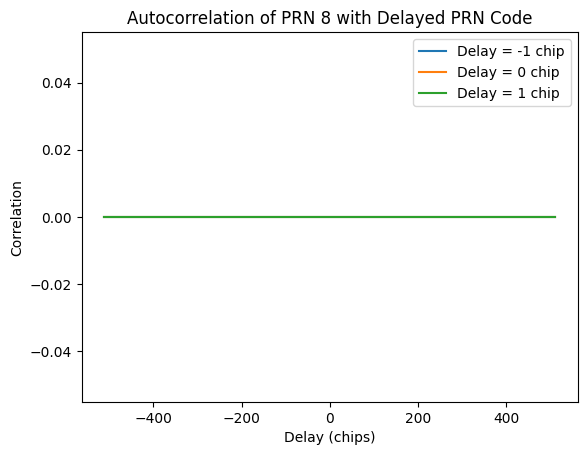

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate PRN code
def generate_prn_code(prn_number, length):
    prn = np.zeros(length, dtype=int)
    feedback_mask = [1, 8]  # MATLAB indexing starts from 1

    for i in range(1, length):
        feedback = np.bitwise_xor(int(prn[feedback_mask[0] - 1]), int(prn[feedback_mask[1] - 1]))
        prn = np.roll(prn, 1)
        prn[0] = feedback

    return prn

# Parameters
prn_number = 8
length = 1023

# Generate PRN code
prn_code = generate_prn_code(prn_number, length)

# Delay by -1, 0, and 1 chip
delays = [-1, 0, 1]
correlations = np.zeros((length, len(delays)))

for i in range(length):
    for j in range(len(delays)):
        delayed_prn_code = np.roll(prn_code, delays[j])
        correlations[i, j] = np.sum(prn_code * delayed_prn_code)

# Plot the autocorrelations
plt.plot(range(-length//2, length//2), correlations)
plt.legend(['Delay = -1 chip', 'Delay = 0 chip', 'Delay = 1 chip'])
plt.title('Autocorrelation of PRN 8 with Delayed PRN Code')
plt.xlabel('Delay (chips)')
plt.ylabel('Correlation')
plt.show()

